In [1]:
import jupyter

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
#Loading the data into the dataframe.
df = pd.read_csv("House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#Grouping the area_types to get the number of types and associated count.
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#Creating a new dataframe with necessary columns.
df1 = df.drop(['area_type', 'society', 'availability', 'balcony'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
#Pre-processing/Data Cleaning - Checking and handling the null values.
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
# Applying some type of function, in order to maintain the equivalancey of the data (Lambda function).
df2['bedroom'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

<ipython-input-7-a7c6142f20fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedroom'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [8]:
# Handling the non-uniform data of total_sqft column using the below function.
def average_sqft(x):
  values = x.split('-')
  if len(values) == 2:
    return (float(values[0]) + float(values[1]))/2
  try:
    return float(x)
  except:
    return None

In [9]:
#Creating a new dataframe and applying the above function to the total_sqft column.
df3 = df2.copy(0)
df3.total_sqft = df3.total_sqft.apply(average_sqft)
# df3['total_sqft'] = df3['total_sqft'].apply(average_sqft)
df3.head(4)

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3


In [10]:
#Creating a new data frame and calculating the price per square.ft.
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000 / df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [11]:
#manipulating and getting the information about the location.
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [12]:
#in order to simplify the data points, setting a frequency for the locations.
location_stats_less_than_ten = location_stats[location_stats <= 10]
location_stats_less_than_ten

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [13]:
#Applying and segregating the locations.
df4.location = df4.location.apply(lambda x: "other" if x in location_stats_less_than_ten else x)

In [14]:
#Eliminating the data errors/anamolies/outliers, using typical threshold for bhk(total_sqft/no.of bhk).
df5 = df4[~(df4.total_sqft/df4.bedroom < 300)]
df5.shape

(12502, 7)

In [15]:
# Basic statistics about the price per sqft column.
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [16]:
# Function to remove price per sqft outliers.
def eliminate_pps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = eliminate_pps(df5)
df6.shape

(10241, 7)

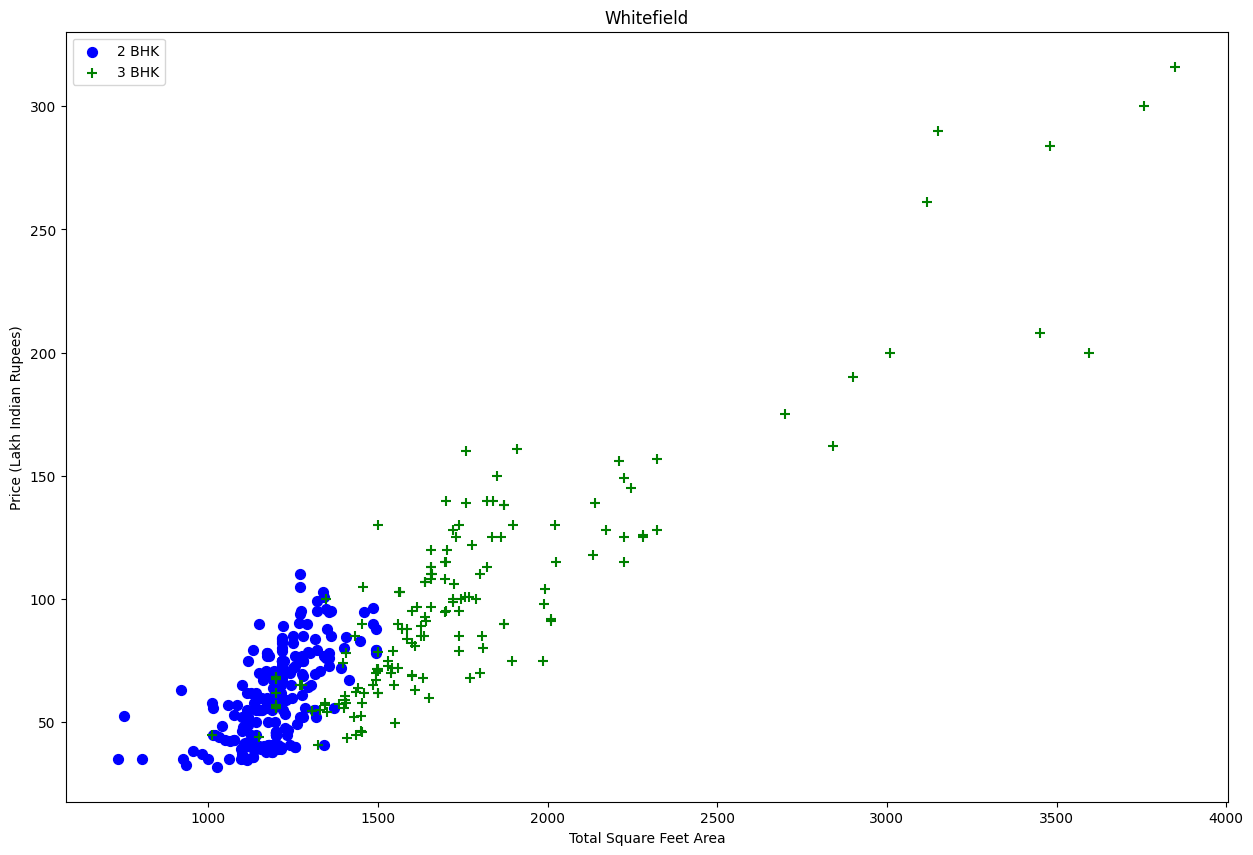

In [17]:
# Function to check the prices of 2BHK and 3BHK, in order to eliminate anamolies.
def plot_scatter_chart(df,location):
    bedroom2 = df[(df.location==location) & (df.bedroom==2)]
    bedroom3 = df[(df.location==location) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bedroom2.total_sqft,bedroom2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bedroom3.total_sqft,bedroom3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6,"Whitefield")

In [18]:
# Creating a dictionary, keys = no.of bhk and values = mean, SD and count.
# We are excluding the points whose value of price per sqft < mean of the earlier bhk.
# Removing the anamolies or cleanup the data by filtering 2 bed apartments, whose value is < mean.
def remove_bhk_anamolies(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedroom'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_anamolies(df6)
df7.shape

(7329, 7)

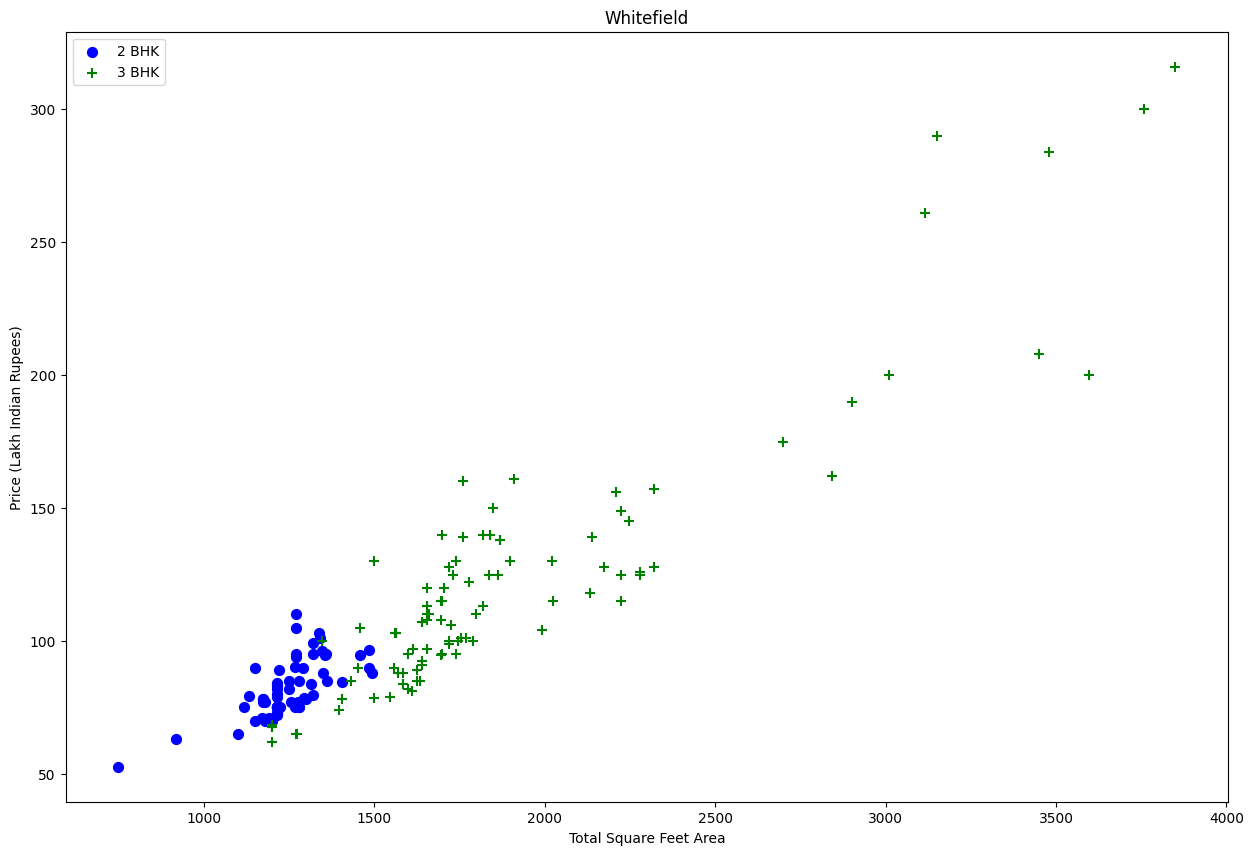

In [19]:
plot_scatter_chart(df7,"Whitefield")

Text(0, 0.5, 'Count')

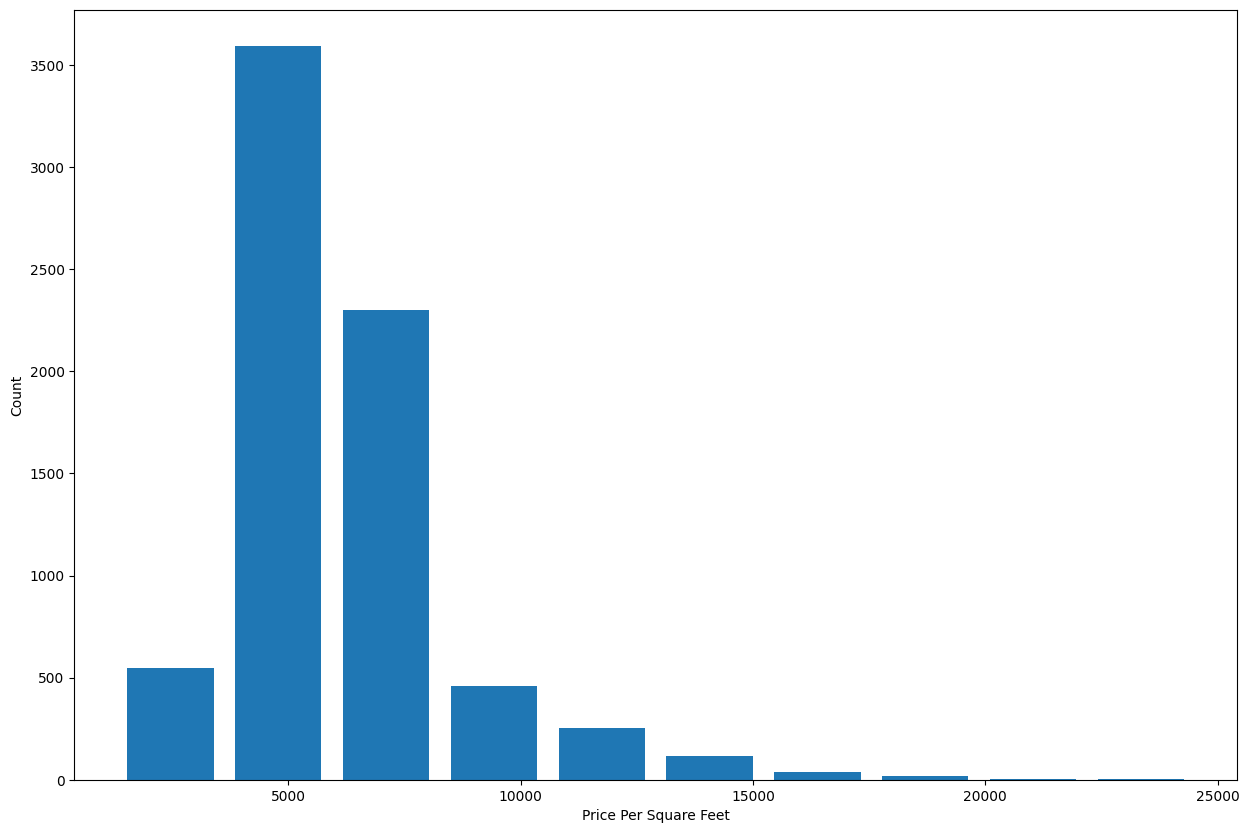

In [20]:
# Plotting a histogram for pps and count, this shows number of data points in that particular category.
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [21]:
# Exploring the bathroom specific outliers.
df7[df7.bath > df7.bedroom+2]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [22]:
# Dropping the unsual data and creating a new dataframe.
df8 = df7[df7.bath < df7.bedroom+2]
df8.shape

(7251, 7)

In [23]:
# Dropping the un-necessary features like price and size.
df9 = df8.drop(['size', 'price_per_sqft'], axis = 'columns')
df9.head()

,location,total_sqft,bath,price,bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [24]:
# Converting text to numeric, since ML model does not interpret text data.
# Using hot coding as it is best technique to convert text to numeric.
dummies = pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Appending dummies dataframe to the pipelined dataset.
df10 = pd.concat([df9, dummies], axis = 'columns')
df10.shape

(7251, 247)

In [26]:
# Dropping the location & price columns.
# X -> independent variables, Y -> dependent variables.
X = df10.drop(['location', 'price'], axis='columns')
Y = df10.price
X.head()

,total_sqft,bath,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Building the model using test train split.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [28]:
# Applying linear regression model.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.8452277697873658

In [31]:
# for best optimal model, first we are going to use K-fold cross validation.
# We can also use grid search CV, in order to find the best model.
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)
cross_val_score(LinearRegression(),X,Y, cv=cv)

array([0.82223266, 0.77167318, 0.85089567, 0.80834861, 0.83653286])

In [38]:
# GridSearchCV it will not only give best algorithm, for that particular algorithm, it will also tell you the best parameters
# This is called hyper parameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algorithms = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'n_jobs': [1, 2, 4, -1],
                'positive': [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    # Shufflesplit randomly shuffles sample for cross validation
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algorithms.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, Y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.821725,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.699286,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.774266,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [30]:
# Function to test the property price predictions.
def price_prediction(location, sqft, bath, bedroom):
  loc_index = np.where(X.columns == location)[0][0]
  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bedroom
  if loc_index >= 0:
    x[loc_index] = 1
  return lr_clf.predict([x])[0]


In [ ]:
price_prediction('Whitefield', 2000, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


132.77376202219529

In [41]:
# Exporting artifacts that are used by python flask server.

import pickle
with open ('house_prediction.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [43]:
# Other than model pickle file, we alson need columns info.
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))